In [6]:
# used only to get current working directory
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [20]:

# load pre-calculated lorenz attractor
state_history = np.loadtxt(r'data\point_data.txt', dtype=np.float)

<ipython-input-20-58f86cd4a7c5>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  state_history = np.loadtxt(r'data\point_data.txt', dtype=np.float)


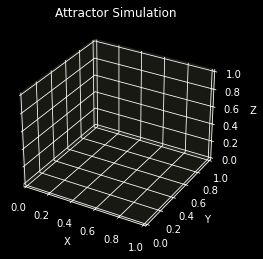

In [21]:
# change plot background to dark
plt.style.use('dark_background')

# create figure
fig = plt.figure()  # figsize=(10, 8)

# data is 3-d so set projection property
ax = plt.axes(projection='3d')

# set title
ax.set(xlabel='X', ylabel='Y', zlabel='Z', title='Attractor Simulation')

# set background pane colours (RGBA values)
ax.w_xaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.w_yaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.w_zaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))

# enable grid
ax.grid()

In [22]:
# determine axis limits using min and max values from corresponding dimension

# x-axis limit
ax.set_xlim3d(min(state_history[:, 0]) - 0.05, max(state_history[:, 0]) + 0.05)

# y-axis limit
ax.set_ylim3d(min(state_history[:, 1]) - 0.05, max(state_history[:, 1]) + 0.05)

# z-axis limit
ax.set_zlim3d(min(state_history[:, 2]) - 0.05, max(state_history[:, 2]) + 0.05)

(8.663758, 42.549425)

In [23]:

# rotate matplotlib axes vertically from zero to 30 degrees
vertical_rotation_angles = np.linspace(0, 30, len(state_history[:, 0]))

# rotate axes horizontally 360 degrees
horizontal_rotation_angles = np.linspace(0, 360, len(state_history[:, 0]))

In [24]:

# trajectory data to plot
trajectory = ax.plot([], [], [])

In [25]:
def animate(i):
    # update axis view angle
    ax.view_init(vertical_rotation_angles[i], horizontal_rotation_angles[i])

    # update trajectory for current time step with x, y data
    trajectory.set_data(state_history[:i, 0], state_history[:i, 1])\
    
    # update z-dimension data
    trajectory.set_3d_properties(state_history[:i, 2])
    
    # return trajectory, _
    return trajectory,

In [29]:
# show animation
animation = anim.FuncAnimation(fig, animate, frames=len(state_history[:, 0]))
plt.show()

In [ ]:
# multiple writers are available - PillowWriter is already installed
writer = anim.PillowWriter(fps=120)
animation.save('data/attractor.gif', writer=writer)

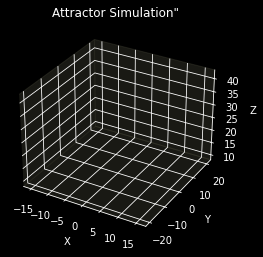

In [35]:
# used only to get current working directory
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

# load pre-calculated lorenz attractor
state_history = np.loadtxt(f'data\point_data.txt', dtype=float)

# change plot background to dark
plt.style.use('dark_background')

# create figure
fig = plt.figure()  # figsize=(10, 8)

# data is 3-d so set projection property
ax = plt.axes(projection='3d')

# set title
ax.set(xlabel='X', ylabel='Y', zlabel='Z', title='Attractor Simulation')

# set background pane colours (RGBA values)
ax.w_xaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.w_yaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
ax.w_zaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))

# enable grid
ax.grid()

# determine axis limits using min and max values from corresponding dimension
ax.set_xlim3d(min(state_history[:, 0]) - 0.05, max(state_history[:, 0]) + 0.05)
ax.set_ylim3d(min(state_history[:, 1]) - 0.05, max(state_history[:, 1]) + 0.05)
ax.set_zlim3d(min(state_history[:, 2]) - 0.05, max(state_history[:, 2]) + 0.05)

# trajectory data to plot
trajectory, = ax.plot([], [], [])

# rotate matplotlib axes from 30 to 360
vertical_rotation_angles = np.linspace(0, 30, len(state_history[:, 0]))
horizontal_rotation_angles = np.linspace(0, 360, len(state_history[:, 0]))


def animate(i):
    # update axis view angle
    ax.view_init(vertical_rotation_angles[i], horizontal_rotation_angles[i])

    # update trajectory for current time step
    trajectory.set_data(state_history[:i, 0], state_history[:i, 1])
    trajectory.set_3d_properties(state_history[:i, 2])
    return trajectory,


# show animation
animation = anim.FuncAnimation(fig, animate, frames=len(state_history[:, 0]))
plt.show()

# save animation as gif
os.makedirs('./animations', exist_ok=True)

writer = anim.PillowWriter(fps=120)
animation.save('./animations/attractor-2.gif', writer=writer)